# CLASSIFICATION OF CONSUMERS DATA
***

# Section: Overview
Pampered Pets Inc., a company that sells pet feeding systems for in-home use, wants to expand it's sales by using a more targeted sales approach. PPL sales agents will call selected prospective customers based on newly avaliable detailed demographic data. As an employee of the company, I have been asked to develop a classifier--which will be used to determine whether or not to call a particular prospect and which product to offer--for the new data based on their demographic data.

In this project, I will configure, excute, and evaluate an off-the-shelf K-Neighbor classifier, Decision Tree Based Methods classifier, and Support Vector Machines classifier based on the "Adult" dataset. To be more specific, I will evaluate classifers based on business criteria, tune and evaluate suitable off-the-shelf classifiers based on the characteristics of a dataset and the outcomes I need.
***

# Section: Setup
The following python libraries and functions are imported to help analyze the dataset.
***

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn import svm
import matplotlib.pyplot as plt 
#%matplotlib inline
#import seaborn as sns

In [2]:
df = pd.read_excel('TEB SPSS Export ADULT for HW2 V2.xlsb', sheet_name = 'Data', engine='pyxlsb', header= 2)

***
# Section: 1 - Evaluation Method
- Define measures for evaluating the classification models you develop.  Explain why the measures you choose provide a useful view into the value and usefulness of the model you eventually chose for the company to use.  Define two types:

***
## Section: 1.1 - Define measures that do not include the cost information
- Confusion matrices: through confusion matrices, we can easily see if the machine confuses different classes.
- Accuracy: accuracy measures the closeness of the measurements to a specific value. We can easily see the accurate rate of the machine through accuracy. Generally, the higher the accuracy, the better the classifier.
- F-measures: it is a measure of a test's accuracy and is defined as the weighted harmonic mean of the precision and recall of the test. Generally, the higher the F-score, the better the classifier.

***
## Section: 1.2 - Define measures that do include the cost information
- profit: I will use profit to measure the profit of our company may get by using the machine. The profit, which is (-1)*cost, is generated by the profit function defined below. 

According to the price of a call and the prices of 3 kinds of feeding systems, I define the cost matrix as:

| Cost | n | c | d | b |
| :--- | :--- | :---| :---| :--- |
| n | 0 | 10 | 10 | 10 |
| c | 0 | 10-800*0.15 = -110 | 10 | 10 |
| d | 0 | 10 | 10-1000*0.15 = -140 | 10 |
| b | 0 | 10 | 10 | 10-1500*0.15 = -215 |

***

In [3]:
cost_matrix = np.mat([[0, 10, 10, 10], [0, -110, 10, 10], [0, 10, -140, 10], [0, 10, 10, -215]])

def ComputeProfit(conf_matrix):
    cost = 0
    for i in range(4):
        for j in range(4):
            cost += cost_matrix[i,j]*conf_matrix[i,j]
    return -cost

***
# Section: 2 - Pre-Processing of the Dataset
- I will split the dataset into a Training dataset and a Test dataset based on the Train attribute at the end of this section.
***

## Section: 2.1 - Explore the attributes

| VARIABLE NAME | DESCRIPTION | TYPE |
| :--- | :--- | :---| 
| RecID | Identity of a row of data | Nominal |
| Train | Training data or not | Nominal |
| Class | The person have dogs or cats or both or none| Nominal | 
| Health(AB1) | GENERAL HEALTH CONDITION | Ordinal | 
| Spouse(AH44) | SPOUSE LIVING IN SAME HOUSEHOLD | Nominal | 
| Education(AHEDUC) | EDUCATIONAL ATTAINMENT | Ordinal | 
| Income(AK22_P) | HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE) | Ratio | 
| Home Type(AK23) | LIVE IN HOUSE, DUPLEX, BUILDING WITH 3+ UNITS, OR MOBILE HOME | Nominal | 
| Number of Rooms(AK24) | # OF ROOMS IN HOME | Ratio | 
| Own or Rent(AK25) | OWN OR RENT HOME | Nominal | 
| Monthly Rent(AK26_P) | MONTHLY RENT/SPACE PAYMENT (PUF RECODE) | Ratio | 
| Monthly Mortgage(AK27_P) | MONTHLY MORTGAGE PAYMENT (PUF RECODE) | Ratio | 
| Citizenship(CITIZEN2) | CITIZENSHIP STATUS (3 LVLS) | Nominal | 
| Country of Birth(CNTRYS) | COUNTRY BORN IN | Nominal | 
| Working Status(EMP) | WORKING STATUS | Nominal | 
| Family Type(FAMT4) | FAMILY TYPE (4 LVLS) | Nominal | 
| Height(HGHTI_P) | HEIGHT - INCHES (PUF RECODE) | Ratio | 
| Marital Status(MARIT) | MARITAL STATUS | Nominal | 
| Race(RACECEN) | RACE-CENSUS 2000 DEFINITION | Nominal | 
| Occupation(OCCMAIN) | MAIN OCCUPATION - 2003 RECODE | Nominal | 
| Age(SRAGE_P) | AGE (PUF RECODE) | Ratio | 
| Gender(SRSEX) | GENDER | Nominal | 
| House Tenure(SRTENR) | SELF-REPORTED HOUSE TENURE | Ratio | 
| Months at Current Address(TIMEAD) | NUMBER OF MONTHS LIVED AT CURRENT ADDRESS | Ratio | 
| Weight(WGHTP_P) | WGHT - POUNDS (PUF RECODE) | Ratio | 
| Walking(WLKANY) | ANY WALKING FOR TRANSPORT OR FUN/EXERCISE | Nominal | 
| Employment Status(WRKST) | EMPLOYMENT STATUS | Nominal | 
| Years in USA(YRUS) | YEARS LIVED IN THE US | Ratio | 

***

In [4]:
#print(df.columns)
#print(df.dtypes)
#df.describe()
df.describe(include = 'all')

,RecID,Train,Class,Health,Spouse,Education,Income,Home Type,Number of Rooms,Own or Rent,...,Race,Occupation,Age,Gender,House Tenure,Months at Current Address,Weight,Walking,Employment Status,Years in USA
count,42044.000000,42044,42044,42044.000000,42044.000000,42044.000000,42044.000000,42044.000000,42044.000000,42044.000000,...,42044.000000,42044.000000,42044.000000,42044.000000,42044.000000,42044.000000,42044.000000,42044.000000,42044.000000,42044.000000
unique,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,y,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,28029,23722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,21022.500000,NaN,NaN,2.490914,0.034726,5.557487,61278.399415,1.633360,4.992008,1.395300,...,4.852678,3.044263,48.798283,1.584316,1.394325,128.704167,165.866521,1.246147,2.633574,0.302469
std,12137.201696,NaN,NaN,1.130577,1.018504,7.044080,55370.773966,0.976172,2.339983,0.547445,...,0.950371,11.138934,17.301665,0.492845,0.547214,139.506857,39.658353,0.505885,1.895034,2.332873
min,1.000000,NaN,NaN,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,-1.000000,18.000000,1.000000,1.000000,1.000000,50.000000,-1.000000,-2.000000,-1.000000
25%,10511.750000,NaN,NaN,2.000000,-1.000000,3.000000,23000.000000,1.000000,3.000000,1.000000,...,5.000000,-1.000000,36.000000,1.000000,1.000000,24.000000,136.000000,1.000000,1.000000,-1.000000
50%,21022.500000,NaN,NaN,2.000000,1.000000,4.000000,45000.000000,1.000000,5.000000,1.000000,...,5.000000,2.000000,48.000000,2.000000,1.000000,72.000000,160.000000,1.000000,1.000000,-1.000000
75%,31533.250000,NaN,NaN,3.000000,1.000000,7.000000,80000.000000,3.000000,6.000000,2.000000,...,5.000000,4.000000,61.000000,2.000000,2.000000,180.000000,189.000000,2.000000,5.000000,-1.000000


***
## Section: 2.2 - Revise the dataset
I encode the attribute -- 'Class'(c->1, d->2, n->3, b->0) and 'Train'(y->1, n->0) (The attributes transform should belong to section 2.3, but I need do the two transformation before I revise the dataset). I replace the negative values with NaN because the negative values are invalid values and they will disturb calculating correlation. I check the number of missing data of each attributes. "Years in USA" has so many missing data so I decide to drop it. Then I replace the NaN with mean values of corresponding columns.

Then I use df.corr() to find the correlation between 'Class' and other attribute and check if the absolute value of their correlation smaller that 0.1 (except 'RecID' and 'Train'). The absolute value of 'Class' and another attribute's correlation smaller that 0.1 means the correlation between 'Class' and the attribute is very small and the attribute is likely irrelevant. Base on this principle, I drop the attributes other than 'RecID', 'Train', 'Class', 'Income', 'Home Type', 'Number of Rooms', 'Own or Rent', 'Citizenship', 'Country of Birth', 'House Tenure'.

After that, by observation, the correlation between 'House Tenure' and 'Own or Rent' is 0.988052 which is close to 1 and it means 'House Tenure' is close related to 'Own or Rent', so keep only one of them is enough. So I drop 'Own or Rent'.

***

In [5]:
df['Class'] = df['Class'].astype('category')
df['Class'] = df['Class'].cat.codes
df['Train'] = df['Train'].astype('category')
df['Train'] = df['Train'].cat.codes

In [6]:
#df.head()
df[df < 0] = np.nan

In [7]:
print("The number of missing values: ")
print(df.isnull().sum())

The number of missing values: 
RecID                            0
Train                            0
Class                            0
Health                           0
Spouse                       20562
Education                        0
Income                           0
Home Type                        0
Number of Rooms                  0
Own or Rent                      0
Monthly Rent                 26489
Monthly Mortgage             15345
Citizenship                      0
Country of Birth                 0
Working Status                 171
Family Type                      0
Height                           0
Marital Status                   0
Race                             0
Occupation                   16723
Age                              0
Gender                           0
House Tenure                     0
Months at Current Address        0
Weight                           0
Walking                        493
Employment Status              171
Years in USA            

In [8]:
df = df.drop(columns=['Years in USA'])
df.fillna(df.mean())

,RecID,Train,Class,Health,Spouse,Education,Income,Home Type,Number of Rooms,Own or Rent,...,Marital Status,Race,Occupation,Age,Gender,House Tenure,Months at Current Address,Weight,Walking,Employment Status
0,1,1,1,1,1.000000,4,50000,1,6,1,...,1,5,5.715256,35,2,1,48,220,1.0,5.0
1,2,1,2,2,1.025137,4,13200,3,3,2,...,2,5,5.715256,81,2,2,60,140,1.0,5.0
2,3,1,3,2,1.000000,3,12000,1,3,2,...,1,2,5.715256,22,2,2,36,120,2.0,5.0
3,4,1,1,1,1.025137,1,8000,1,6,2,...,2,2,5.715256,62,1,2,144,175,2.0,5.0
4,5,1,2,1,1.000000,7,65000,1,5,1,...,1,7,5.715256,41,1,1,144,180,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42039,42040,0,2,1,1.000000,7,130000,1,7,1,...,1,3,99.000000,40,2,1,120,100,2.0,1.0
42040,42041,0,3,2,1.000000,3,70000,3,6,1,...,1,4,3.000000,47,2,1,192,110,2.0,1.0
42041,42042,0,3,3,1.025137,3,20000,3,1,2,...,3,4,5.715256,22,2,2,12,160,2.0,4.0
42042,42043,0,2,3,1.025137,3,27000,1,5,2,...,2,4,5.715256,27,2,2,24,140,1.0,4.0


In [9]:
cor = df.corr()
attriName = np.array(cor.columns)
#print(cor)
classCor = np.array(cor['Class'])
for i in range(len(classCor)):
    if(i>1 and abs(classCor[i])<0.1):
        df = df.drop(columns=[attriName[i]])
print(df.corr())
print('\n')

                     RecID     Train     Class    Income  Home Type  \
RecID             1.000000 -0.816501  0.023049 -0.001819   0.018983   
Train            -0.816501  1.000000 -0.023202  0.001648  -0.018476   
Class             0.023049 -0.023202  1.000000 -0.127607   0.151969   
Income           -0.001819  0.001648 -0.127607  1.000000  -0.260418   
Home Type         0.018983 -0.018476  0.151969 -0.260418   1.000000   
Number of Rooms  -0.019032  0.020117 -0.195801  0.406292  -0.406330   
Own or Rent       0.022425 -0.030494  0.136469 -0.304064   0.364591   
Citizenship       0.015306 -0.015392  0.255724 -0.166017   0.122205   
Country of Birth  0.030070 -0.026994  0.168644 -0.027168   0.050698   
House Tenure      0.024152 -0.031306  0.136816 -0.302551   0.361894   

                  Number of Rooms  Own or Rent  Citizenship  Country of Birth  \
RecID                   -0.019032     0.022425     0.015306          0.030070   
Train                    0.020117    -0.030494    -0.015

In [10]:
df = df.drop(columns=['Own or Rent'])

In [11]:
print(df.columns)
print(df.dtypes)

Index(['RecID', 'Train', 'Class', 'Income', 'Home Type', 'Number of Rooms',
       'Citizenship', 'Country of Birth', 'House Tenure'],
      dtype='object')
RecID               int64
Train                int8
Class                int8
Income              int64
Home Type           int64
Number of Rooms     int64
Citizenship         int64
Country of Birth    int64
House Tenure        int64
dtype: object


***
## Section: 2.3 - Transform the attributes
I encode the attribute -- 'Class'(c->1, d->2, n->3, b->0) and 'Train'(y->1, n->0) in section 2.2 since I need the data type of Class to be int to calculate the correlation between Class and other attributes and I need that data type of Train to be int so I can apply df[df < 0] = np.nan.

I nomalize 'Income' to avoid the influence of dimension on calculating distance in KKN algorithm.
***

In [12]:
#normalization
df['Income'] = (df['Income']-df['Income'].mean())/(df['Income'].std()) 

In [13]:
# Split the data into a training dataset and a test dataset
df_train = df.loc[df['Train'] == 1]
df_test = df.loc[df['Train'] == 0]

x_train = df_train.iloc[:, 3:].values
y_train = df_train.iloc[:, 2].values
x_test = df_test.iloc[:, 3:].values
y_test = df_test.iloc[:, 2].values

***
# Section: 3 - Evaluation of the Off-The-Shelf KNN Classifier
- KNN classifier

***
## Section: 3.1 - Configure the off-the-shelf KNN classifier
- 'n_neighbor' is the number of neighbors to use by default for kneighbors queries. I set it to the value 2 because k = 2 maximizesthe the profit in this case.


- 'weights' is weight function used in prediction. I set the value to 'uniform', which means points in each neighborhood are weighted equally.


- 'algorithm' is algorithm used to compute the nearest neighbors. I set the value to 'auto', which means it will attempt to decide the most appropriate algorithm based on the values passed to fit method.


- 'leaf_size' is the leaf size passed to BallTree or KDTree. I set the value to 30, which is the default value. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.


- 'p' is power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. So I set the value to 2.


- 'metric' is the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. If metric is “precomputed”, X is assumed to be a distance matrix and must be square during fit. So I set it to 'minkowski', which is also it's default matric.


- 'metric_params' is additional keyword arguments for the metric function. I set it to it's default value 'None'.


- 'n_jobs' is the number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. It doesn’t affect fit method. I set it to it's default value 'None'.


Reference: sklearn.neighbors.KNeighborsClassifier documentation
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
***

In [14]:
KNeighborsClassifier(n_neighbors=2, weights='uniform', algorithm='auto', 
                     leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

# Feature Scaling
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

***
## Section: 3.2 - Run and evaluate the classifier
I plot the profit vs. k value for k values between 1 and 10, and get the conclusion that k = 2 maximizesthe the profit. So I choose k = 2 as the final k value. 

As the report shown below, the profit of KNN Classifier (k = 2) is round 151470$ and this is a reletively good result. The accuracy is 0.36 which is not very good. The f1-score of b (having both cat and dog), c (having cat), d (having dog), and n (having no cat or dog) are 0.18, 0.20, 0.23, and 0.53. And the weighted average f1-score is 0.40.
***

In [15]:
profit = []
# Calculating profit for K values between 1 and 10
for i in range(1, 10):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred, labels=[3,1,2,0])
    pro = ComputeProfit(conf_matrix)
    profit.append(pro)

Text(0, 0.5, 'Profit')

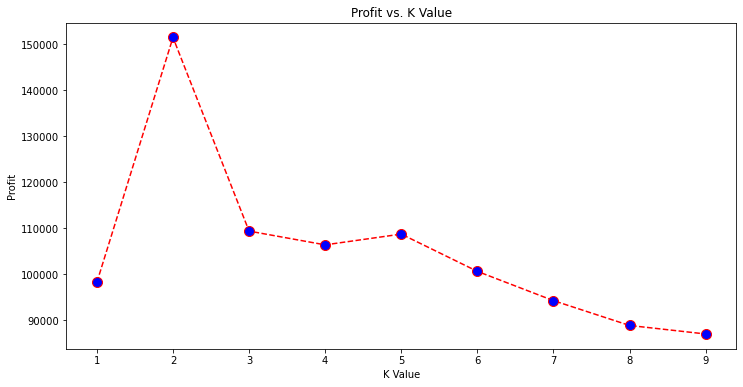

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), profit, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Profit vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Profit')

In [17]:
# Training; K = 2
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train, y_train)
# Prediction
knn_y_pred = classifier.predict(x_test)
conf_matrix = confusion_matrix(y_test, knn_y_pred, labels=[3,1,2,0])
knn_profit = ComputeProfit(conf_matrix)
print("Result fot K=2:")
#print("Confusion matrix:")
#print(conf_matrix)
print("Profit:",knn_profit)
print("\n Remind that 0->b, 1->c, 2->d, 3->n")
print(classification_report(y_test, knn_y_pred))

Result fot K=2:
Profit: 151470

 Remind that 0->b, 1->c, 2->d, 3->n
              precision    recall  f1-score   support

           0       0.14      0.29      0.18      1299
           1       0.17      0.24      0.20      2095
           2       0.20      0.26      0.23      2425
           3       0.70      0.43      0.53      8196

    accuracy                           0.36     14015
   macro avg       0.30      0.31      0.29     14015
weighted avg       0.48      0.36      0.40     14015



***
## Section: 3.3 - Evaluate the choice of the KNN classifier
The KNN classifier mainly relies on the surrounding samples, rather than discriminating the class field to determine the category, so the KNN classifier is better than other methods for the problems with sample sets which have more overlapping in class field. And the KNN classifier is more suitable for the classification of class field with a relatively large sample size, and for those with a relatively small sample size, KNN classifier are prone to misclassify. So it's a good choice to apply KNN to the problems with large sample size while applying KNN to the problems with small sample size is not a good idea.

***
# Section: 4 - Evaluation of Off-The-Shelf Classifier #2
- Decision Tree

***
## Section: 4.1 - Configure the classifier
- 'criterion' is the function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. I set it to it's default value 'gini'.


- 'splitter' is the strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split. I set it to it's default value 'best'.


- 'max_depth' is the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. I set it to it's default value 'None'.


- 'min_samples_split'is the minimum number of samples required to split an internal node. I set it to it's default value '2'.


- 'min_samples_leaf' is the minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. I set it to it's default value '1'.


- 'min_weight_fraction_leaf' is the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided. I set it to it's default value '0.0'.


- 'max_features' is the number of features to consider when looking for the best split. I set it to it's default value 'None'.


- 'random_state' controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. I set it to it's default value 'None'.


- 'max_leaf_nodes': Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes. I set it to it's default value 'None'.


- 'min_impurity_decrease': A node will be split if this split induces a decrease of the impurity greater than or equal to this value. I set it to it's default value '0.0'.


- 'min_impurity_split': Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf. I set it to it's default value 'None'.


- 'class_weight' are weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. I set it to it's default value 'None'.


- 'ccp_alpha' is a complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. I set it to it's default value '0.0'.


Reference: sklearn.tree.DecisionTreeClassifier documentation 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn-tree-decisiontreeclassifier
***

In [18]:
sk.tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                    max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                    min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                                    max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                    class_weight=None, ccp_alpha=0.0)

DecisionTreeClassifier()

***
## Section: 4.2 - Run and evaluate the classifier
I modify the DecisionTreeClassifier's values of 'criterion' and 'splitter' and the results are nearly same. So I will evaluate one of them.

For Decision Tree Classifier with criterion='gini' and splitter='best', as the report shown below, the profit of using Decision Tree Classifier is around 7600$. The accuracy is 0.49. The f1-score of b (having both cat and dog), c (having cat), d (having dog), and n (having no cat or dog) are 0.10, 0.13, 0.20, and 0.67. And the weighted average f1-score is 0.46. 
***

In [19]:
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best')
clf_train = clf.fit(x_train, y_train)
dtc_y_pred = clf.predict(x_test)
conf_matrix = confusion_matrix(y_test, dtc_y_pred, labels=[3,1,2,0])
dtc_profit = ComputeProfit(conf_matrix)
print("criterion='gini', splitter='best':")
print("Profit:",dtc_profit)
print("Remind that 0->b, 1->c, 2->d, 3->n")
print(classification_report(y_test, dtc_y_pred))

clf = tree.DecisionTreeClassifier(criterion='gini', splitter='random')
clf_train = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels=[3,1,2,0])
profit = ComputeProfit(conf_matrix)
print("criterion='gini', splitter='random':")
print("Profit:",profit)
print("Remind that 0->b, 1->c, 2->d, 3->n")
print(classification_report(y_test, y_pred))

clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best')
conf_matrix = confusion_matrix(y_test, y_pred, labels=[3,1,2,0])
profit = ComputeProfit(conf_matrix)
print("criterion='entropy', splitter='best':")
print("Profit:",profit)
print("Remind that 0->b, 1->c, 2->d, 3->n")
print(classification_report(y_test, y_pred))

clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='random')
clf_train = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels=[3,1,2,0])
profit = ComputeProfit(conf_matrix)
print("criterion='entropy', splitter='random':")
print("Profit:",profit)
print("Remind that 0->b, 1->c, 2->d, 3->n")
print(classification_report(y_test, y_pred))

criterion='gini', splitter='best':
Profit: 75825
Remind that 0->b, 1->c, 2->d, 3->n
              precision    recall  f1-score   support

           0       0.13      0.09      0.10      1299
           1       0.17      0.10      0.13      2095
           2       0.22      0.18      0.20      2425
           3       0.61      0.75      0.67      8196

    accuracy                           0.49     14015
   macro avg       0.28      0.28      0.28     14015
weighted avg       0.44      0.49      0.46     14015

criterion='gini', splitter='random':
Profit: 76555
Remind that 0->b, 1->c, 2->d, 3->n
              precision    recall  f1-score   support

           0       0.13      0.09      0.10      1299
           1       0.18      0.10      0.13      2095
           2       0.23      0.18      0.20      2425
           3       0.61      0.75      0.67      8196

    accuracy                           0.49     14015
   macro avg       0.29      0.28      0.28     14015
weighted avg   

***
## Section: 4.3 - Evaluate the choice of the classifier
For Decision Tree classifier, data preparation is often simple or unnecessary because it is not sensitive to missing data, and it can handle different types of attributes and irrelevant characteristic data. And the efficiency of Decision Tree classifier is high and the decision tree only needs to be constructed once and we can use it repeatedly. So Decision Tree would be a good choice for the problem which requires gigh efficiency. And it also a good choice for the dataset which has lots of missing data, or have different types of attributes or irrelevant characteristic data. 

It is difficult to predict continuous fields by Decision Tree classifier. And for chronological data, we need do a lot of preprocessing before applying Decision Tree classifier. And when there are too many categories, the error rate would be high. Besides, Decision Tree classifier does not perform well when dealing with data with strong characteristic correlation. So Decision Tree would be a bad choice if the dataset contains chronological data, or has too many categories, or has the data with strong characteristic correlation, or has continuous fields.

***
# Section: 5 - Evaluation of Off-The-Shelf Classifier #3
- Support Vector Machines

***
## Section: 5.1 - Configure the classifier
- 'C' is regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. I set it to it's default value '1.0'.


- 'kernel' specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples). I set it to it's default value 'rbf'.


- 'degree' is degree of the polynomial kernel function (‘poly’). Ignored by all other kernels. I set it to it's default value '3'.


- 'gamma' is kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma; If ‘auto’, uses 1 / n_features. I set it to 'auto'.


- 'coef0' is an independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’. I set it to it's default value '0.0'.


- 'shrinking' is whether to use the shrinking heuristic. I set it to it's default value 'True'.


- 'probability' is whether to enable probability estimates. This must be enabled prior to calling fit, will slow down that method as it internally uses 5-fold cross-validation, and predict_proba may be inconsistent with predict. I set it to it's default value 'False'.


- 'tol' is tolerance for stopping criterion. I set it to it's default value '0.001'.


- 'cache_size' specifies the size of the kernel cache (in MB). I set it to it's default value '200'.


- 'class_weight': Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). I set it to it's default value 'None'.


- 'verbose' enable verbose output. Note that this setting takes advantage of a per-process runtime setting in libsvm that, if enabled, may not work properly in a multithreaded context. I set it to it's default value 'False'.


- 'max_iter': hard limit on iterations within solver, or -1 for no limit. I set it to it's default value '-1'.


- 'decision_function_shape' is whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy. The parameter is ignored for binary classification. I set it to it's default value 'ovr'.


- 'break_ties': If true, decision_function_shape='ovr', and number of classes > 2, predict will break ties according to the confidence values of decision_function; otherwise the first class among the tied classes is returned. Note that breaking ties comes at a relatively high computational cost compared to a simple predict. I set it to it's default value 'False'.


- 'random_state' controls the pseudo random number generation for shuffling the data for probability estimates. Ignored when probability is False. Pass an int for reproducible output across multiple function calls. I set it to it's default value 'None'.


Reference: sklearn.svm.SVC documentation
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
***

In [20]:
sk.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
           probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
           max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

SVC(gamma='auto')

***
## Section: 5.2 - Run and evaluate the classifier
I modify the value of 'kernel' and 'gamma' and the profit of SVM classifier with kernel='rbf' and gamma is 'auto', and SVM classifier with kernel is 'rbf' and gamma is 'scale' are 180 dollor while the SVM classifier with kernel is 'linear' and gamma is 'auto' has 0 profit. And the f1-score of the three SVM classifier with different parameters are same. So I will evaluate one of SVM classifier which has 180 dollor profit.

For the SVM classifier with kernel is 'rbf' and gamma is 'auto', as the result report shown below, the profit of using Decision Tree Classifier is around 180$. The accuracy is 0.58. The f1-score of b(having both cat and dog), c (having cat), d (having dog), and n (having no cat or dog) are 0.00, 0.00, 0.00, and 0.74. And the weighted average f1-score is 0.43.
***

In [21]:
svc = svm.SVC()
#kernel='rbf', gamma='auto'
svc.fit(x_train, y_train)
svm_y_pred = svc.predict(x_test)

conf_matrix = confusion_matrix(y_test, svm_y_pred, labels=[3,1,2,0])
svm_profit = ComputeProfit(conf_matrix)
print("Confusion Matrix:",conf_matrix)
print("Profit:",svm_profit)
print("\n Remind that 0->b, 1->c, 2->d, 3->n")
print(classification_report(y_test, svm_y_pred))

Confusion Matrix: [[8192    0    4    0]
 [2090    0    5    0]
 [2423    0    2    0]
 [1298    0    1    0]]
Profit: 180

 Remind that 0->b, 1->c, 2->d, 3->n
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1299
           1       0.00      0.00      0.00      2095
           2       0.17      0.00      0.00      2425
           3       0.59      1.00      0.74      8196

    accuracy                           0.58     14015
   macro avg       0.19      0.25      0.18     14015
weighted avg       0.37      0.58      0.43     14015



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
svc = svm.SVC(gamma='scale')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels=[3,1,2,0])
profit = ComputeProfit(conf_matrix)
print("Profit:",profit)
print("\n Remind that 0->b, 1->c, 2->d, 3->n")
print(classification_report(y_test, y_pred))

Profit: 180

 Remind that 0->b, 1->c, 2->d, 3->n
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1299
           1       0.00      0.00      0.00      2095
           2       0.17      0.00      0.00      2425
           3       0.59      1.00      0.74      8196

    accuracy                           0.58     14015
   macro avg       0.19      0.25      0.18     14015
weighted avg       0.37      0.58      0.43     14015



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
svc = svm.SVC(kernel='linear')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels=[3,1,2,0])
profit = ComputeProfit(conf_matrix)
print("Profit:",profit)
print("\n Remind that 0->b, 1->c, 2->d, 3->n")
print(classification_report(y_test, y_pred))

Profit: 0

 Remind that 0->b, 1->c, 2->d, 3->n
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1299
           1       0.00      0.00      0.00      2095
           2       0.00      0.00      0.00      2425
           3       0.58      1.00      0.74      8196

    accuracy                           0.58     14015
   macro avg       0.15      0.25      0.18     14015
weighted avg       0.34      0.58      0.43     14015



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***
## Section: 5.3 - Evaluate the choice of the classifier
It's difficult for SVM classifier to implement on large-scale training samples and solve multiple classification problems. So it would be a bad choice to use SVM for the problems which have arge-scale training samples or multiple classifications. 

SVM is a small-scale sample learning method. It basically does not involve probability measurement and the law of large numbers. And the final decision function of SVM is determined by only a few support vectors, and the complexity of calculation depends on the number of support vectors, not the dimensionality of the sample space. So it would be a good choice to use SVM for the problems with small-scale sample.

***
# Section: 6 - Comparison of the Three Classifiers

***
## Section: 6.1 - Compare the performance of these classifiers to each other
The bar graphs of the measures of the three classifiers are shown below. The profit of KNN, Decision Tree, and SVM are 151470, 75165, and 180, respectively (The profit may silightly change each time run the classifiers.). The accuracy of KNN, Decision Tree, and SVM are 0.36, 0.49, and 0.58. The weighted average F1-score of KNN, Decision Tree, and SVM are 0.40, 0.46, and 0.43. In terms of profit, KNN is the best choice and SVM is the worst choice. In terms of accuracy, SVM is the best choice and KNN is the worst choice. In terms of weighted average F1-score, Decision Tree is the best choice and KNN is the worst choice.
***

<ipython-input-24-18d5dc77b849>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(profit_list)), profit_list, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


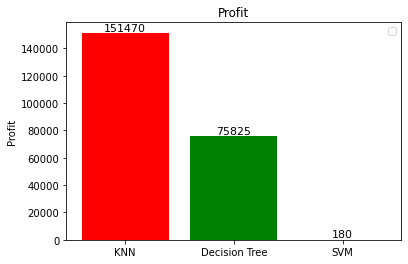

<ipython-input-24-18d5dc77b849>:19: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(accuracy)), accuracy, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


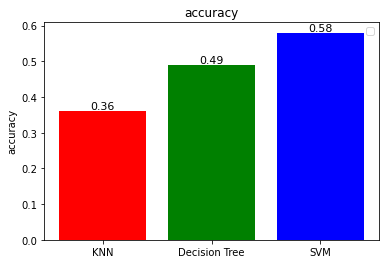

<ipython-input-24-18d5dc77b849>:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(weighted_avg_f1)), weighted_avg_f1, color='rgb', tick_label=name_list)
No handles with labels found to put in legend.


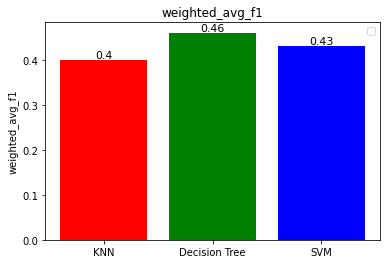

In [24]:
name_list = ['KNN','Decision Tree','SVM']
profit_list = [knn_profit,dtc_profit,svm_profit]
plt.bar(range(len(profit_list)), profit_list, color='rgb', tick_label=name_list)
plt.text(0, knn_profit+0.05, knn_profit, ha='center', va= 'bottom',fontsize=11)
plt.text(1, dtc_profit+0.05, dtc_profit, ha='center', va= 'bottom',fontsize=11)
plt.text(2, svm_profit+0.05, svm_profit, ha='center', va= 'bottom',fontsize=11)
plt.title('Profit')
plt.ylabel('Profit')
plt.legend()
plt.show()

report_knn = classification_report(y_test, knn_y_pred).split()
report_dtc = classification_report(y_test, dtc_y_pred).split()
report_svm = classification_report(y_test, svm_y_pred).split()

accuracy = [float(report_knn[25]), float(report_dtc[25]), float(report_svm[25])]
weighted_avg_f1 = [float(report_knn[37]), float(report_dtc[37]), float(report_svm[37])]

plt.bar(range(len(accuracy)), accuracy, color='rgb', tick_label=name_list)
plt.text(0, accuracy[0], accuracy[0], ha='center', va= 'bottom',fontsize=11)
plt.text(1, accuracy[1], accuracy[1], ha='center', va= 'bottom',fontsize=11)
plt.text(2, accuracy[2], accuracy[2], ha='center', va= 'bottom',fontsize=11)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.bar(range(len(weighted_avg_f1)), weighted_avg_f1, color='rgb', tick_label=name_list)
plt.text(0, weighted_avg_f1[0], weighted_avg_f1[0], ha='center', va= 'bottom',fontsize=11)
plt.text(1, weighted_avg_f1[1], weighted_avg_f1[1], ha='center', va= 'bottom',fontsize=11)
plt.text(2, weighted_avg_f1[2], weighted_avg_f1[2], ha='center', va= 'bottom',fontsize=11)
plt.title('weighted_avg_f1')
plt.ylabel('weighted_avg_f1')
plt.legend()
plt.show()

# print("Result Report of KNN: ")
# print("Profit: ", knn_profit)
# print(classification_report(y_test, knn_y_pred))
# print("Result Report of Decision Tree: ")
# print("Profit: ", dtc_profit)
# print(classification_report(y_test, dtc_y_pred))
# print("Result Report of SVM: ")
# print("Profit: ", svm_profit)
# print(classification_report(y_test, svm_y_pred))

***
## Section: 6.2 - Choose a Best Classifier

Accuracy is not a good metric for predictive models when classifying in predictive analytics because a simple model may have a high level of accuracy but be too crude to be useful. So I will not choose classifier according to accuracy. So I will choose the best classifier according to the other two measures.

The profit is one of the most important measure for a company, so I will assign more weight to this measure. In the evaluation code below, I assign weight 2 to profit and assign weight 1 to weighted average F1-score. And I scale the profit by dividing the profit of KNN which is the largest one so the values of profit have same scope with the values of weighted average F1-score.

By the new measure according to the profit and weighted average F1-score, KNN is the best choice since it has the highest score -- 2.4. Thus, I choose KNN classifier as the best classifier.

<ipython-input-25-09f4f2e8fd5d>:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(range(len(measure)), measure, color='rgb', tick_label=name_list)


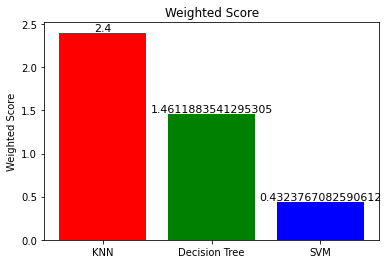

In [25]:
profit = [1,dtc_profit/knn_profit,svm_profit/knn_profit]
measure = []
for i in range(len(profit)):
    measure.append(profit[i]*2+weighted_avg_f1[i])

plt.bar(range(len(measure)), measure, color='rgb', tick_label=name_list)
plt.text(0, measure[0], measure[0], ha='center', va= 'bottom',fontsize=11)
plt.text(1, measure[1], measure[1], ha='center', va= 'bottom',fontsize=11)
plt.text(2, measure[2], measure[2], ha='center', va= 'bottom',fontsize=11)
plt.title('Weighted Score')
plt.ylabel('Weighted Score')
plt.show()

***
# Section: 7 - Conclusions

From this project, I learn how to configure, excute, and evaluate an off-the-shelf K-Neighbor classifier, Decision Tree Based Methods classifier, and Support Vector Machines classifie. And I get a better knowledge about those classifiers' advantages and disadvantages and also learn about the what's the suitable condition to apply KNN, Decision Tree, and SVM. What's more, I get a deeper understanding about confusion matrix, the calculation of cost(or profit), accuracy, and F1-score. 